In [75]:
# Importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn import datasets, model_selection, metrics
import scipy as sp
from scipy.stats import ttest_ind
from scipy import stats
from scipy.stats import boxcox

from functions import * 

# Print a confirmation message
print("Libraries imported successfully!")

Libraries imported successfully!


In [12]:
df_demo = pd.read_csv('../data/cleaned/df_final_demo_cleaned.csv')
df_demo.head()

,client_id,tenure_year,tenure_month,age,gender,number_of_accounts,balance,calls_6_month,logons_6_month
0,836976,6.0,73.0,60.5,U,2,45105.30,6,9
1,2304905,7.0,94.0,58.0,U,2,110860.30,6,9
2,1439522,5.0,64.0,32.0,U,2,52467.79,6,9
3,1562045,16.0,198.0,49.0,M,2,67454.65,3,6
4,5126305,12.0,145.0,33.0,F,2,103671.75,0,3


In [13]:
df_experiment = pd.read_csv('../data/cleaned/df_final_experiment_clients_cleaned.csv')
df_experiment.head()



,client_id,variation
0,9988021,Test
1,8320017,Test
2,4033851,Control
3,1982004,Test
4,9294070,Control


In [14]:
df_web = pd.read_csv('../data/cleaned/df_final_web_data_cleaned.csv')
df_web.head()

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04


## Merge the 3 dataframes on the 'client_id' column

In [15]:
# Merging df_demo and df_experiment, df_web, on client_id
# Call function
df3 = merge_3(df_demo, df_experiment, df_web)
df3.head()

,client_id,tenure_year,tenure_month,age,gender,number_of_accounts,balance,calls_6_month,logons_6_month,variation,visitor_id,visit_id,process_step,date_time
0,836976,6.0,73.0,60.5,U,2,45105.3,6,9,Test,427070339_1413275162,228976764_46825473280_96584,confirm,2017-04-02 11:51:13
1,836976,6.0,73.0,60.5,U,2,45105.3,6,9,Test,427070339_1413275162,228976764_46825473280_96584,confirm,2017-04-02 11:47:50
2,836976,6.0,73.0,60.5,U,2,45105.3,6,9,Test,427070339_1413275162,228976764_46825473280_96584,confirm,2017-04-02 11:46:45
3,836976,6.0,73.0,60.5,U,2,45105.3,6,9,Test,427070339_1413275162,228976764_46825473280_96584,step_3,2017-04-02 11:23:08
4,836976,6.0,73.0,60.5,U,2,45105.3,6,9,Test,427070339_1413275162,228976764_46825473280_96584,step_2,2017-04-02 11:22:24


## Convert 'date_time' to datetime Format

In [16]:
# Convert to datetime

# call function
df3_processed_date = process_datetime(df3, datetime_column='date_time', sort_columns=['visit_id', 'date_time'])
df3_processed_date.head(10)


,client_id,tenure_year,tenure_month,age,gender,number_of_accounts,balance,calls_6_month,logons_6_month,variation,visitor_id,visit_id,process_step,date_time
300510,3561384,4.0,56.0,59.5,U,2,63130.44,6,9,Test,451664975_1722933822,100012776_37918976071_457913,confirm,2017-04-26 13:22:17
300509,3561384,4.0,56.0,59.5,U,2,63130.44,6,9,Test,451664975_1722933822,100012776_37918976071_457913,confirm,2017-04-26 13:23:09
76889,7338123,7.0,88.0,23.5,M,2,26436.73,6,9,Test,612065484_94198474375,100019538_17884295066_43909,start,2017-04-09 16:20:56
76888,7338123,7.0,88.0,23.5,M,2,26436.73,6,9,Test,612065484_94198474375,100019538_17884295066_43909,step_1,2017-04-09 16:21:12
76887,7338123,7.0,88.0,23.5,M,2,26436.73,6,9,Test,612065484_94198474375,100019538_17884295066_43909,step_2,2017-04-09 16:21:21
76886,7338123,7.0,88.0,23.5,M,2,26436.73,6,9,Test,612065484_94198474375,100019538_17884295066_43909,step_1,2017-04-09 16:21:35
76885,7338123,7.0,88.0,23.5,M,2,26436.73,6,9,Test,612065484_94198474375,100019538_17884295066_43909,step_1,2017-04-09 16:21:41
76884,7338123,7.0,88.0,23.5,M,2,26436.73,6,9,Test,612065484_94198474375,100019538_17884295066_43909,start,2017-04-09 16:21:45
76883,7338123,7.0,88.0,23.5,M,2,26436.73,6,9,Test,612065484_94198474375,100019538_17884295066_43909,start,2017-04-09 16:21:59
76882,7338123,7.0,88.0,23.5,M,2,26436.73,6,9,Test,612065484_94198474375,100019538_17884295066_43909,step_1,2017-04-09 16:22:04


## Check that each visit_id has only 1 "confirm" step

In [17]:
# Check that each visit_id has only 1 "confirm" step
# Call function
count_duplicate_confirms(df3_processed_date)

duplicated 'confirm' steps: 3713


## Remove duplicated 'confirm' steps (keep only 1st occurrence)

In [20]:
# Remove duplicated 'confirm' steps (keep only 1st occurrence)
# Call function
df_cleaned_no_duplicated_confirms_step = remove_duplicate_confirms(df3_processed_date)
count_duplicate_confirms(df_cleaned_no_duplicated_confirms)

duplicated 'confirm' steps: 0


In [21]:
#export df to csv: df_cleaned_without_duplicated_confirms
df_cleaned_no_duplicated_confirms_step.to_csv('../data/cleaned/df_cleaned_no_duplicated_confirms_step.csv', index=False)

# Bivariate : Categorical vs Continuous. 
Categorical vs Numerical Variable (category: Old/new design  vs time spent):
### Violin Plots : Old/new design  vs time spent
Combines a box plot with a kernel density plot to show the distribution of a continuous variable for each category.

# KPIs

## KPIs: Calculate the total time spent for each visit_id

### Calculating the time spent for each visit

In [24]:
#calculating the time spent for each visit in min
df_total_time_per_visit_id = calculate_time_spent(df_cleaned_no_duplicated_confirms_step)
df_total_time_per_visit_id.head() 

,client_id,tenure_year,tenure_month,age,gender,number_of_accounts,balance,calls_6_month,logons_6_month,variation,visitor_id,visit_id,total_time_per_visit_id
0,3561384,4.0,56.0,59.5,U,2,63130.44,6,9,Test,451664975_1722933822,100012776_37918976071_457913,0 days 00:00:00
1,7338123,7.0,88.0,23.5,M,2,26436.73,6,9,Test,612065484_94198474375,100019538_17884295066_43909,0 days 00:04:02
12,2478628,16.0,198.0,47.0,F,2,32456.28,2,5,Test,754122351_18568832435,100022086_87870757897_149620,0 days 00:03:00
17,105007,9.0,118.0,35.0,F,2,34897.47,3,6,Control,676020267_36602664238,100030127_47967100085_936361,0 days 00:00:00
18,5623007,16.0,202.0,78.0,M,2,146827.14,5,8,Control,700426174_33289797318,100037962_47432393712_705583,0 days 00:02:12


In [26]:
#calculating the time spent for each visit in seconds:
def calculate_time_per_visit_sec(df):
    # Dropping the 'process_step' column if it exists
    if 'process_step' in df.columns:
        df = df.drop(columns=['process_step'])

    # Grouping by 'visit_id' and calculating the time spent for each visit
    df['time_per_visit_in_sec'] = df.groupby('visit_id')['date_time'].transform(lambda x: (x.max() - x.min()).total_seconds())

    # Converting time difference to seconds and changing the data type to int64
    df['time_per_visit_in_sec'] = df['time_per_visit_in_sec'].astype('int64')

    # Dropping duplicate rows based on 'visit_id' while keeping the first occurrence
    df = df.drop_duplicates(subset='visit_id')

    # Dropping the 'date_time' column
    df = df.drop(columns=['date_time'])

    return df

# Example usage:
df_time_per_visit_sec = calculate_time_per_visit_sec(df_cleaned_no_duplicated_confirms_step)
df_time_per_visit_sec

,client_id,tenure_year,tenure_month,age,gender,number_of_accounts,balance,calls_6_month,logons_6_month,variation,visitor_id,visit_id,time_per_visit_in_sec
0,3561384,4.0,56.0,59.5,U,2,63130.44,6,9,Test,451664975_1722933822,100012776_37918976071_457913,0
1,7338123,7.0,88.0,23.5,M,2,26436.73,6,9,Test,612065484_94198474375,100019538_17884295066_43909,242
12,2478628,16.0,198.0,47.0,F,2,32456.28,2,5,Test,754122351_18568832435,100022086_87870757897_149620,180
17,105007,9.0,118.0,35.0,F,2,34897.47,3,6,Control,676020267_36602664238,100030127_47967100085_936361,0
18,5623007,16.0,202.0,78.0,M,2,146827.14,5,8,Control,700426174_33289797318,100037962_47432393712_705583,132
...,...,...,...,...,...,...,...,...,...,...,...,...,...
311952,2979920,11.0,138.0,28.5,F,2,83799.17,1,4,Test,830229399_73416253406,999971096_28827267783_236076,139
311958,4449968,21.0,252.0,53.5,F,4,124701.46,2,5,Test,842902495_57580498240,999976049_95772503197_182554,728
311964,829911,6.0,82.0,84.5,M,3,229828.31,6,9,Test,648229874_89449279372,999984454_18731538378_781808,154
311969,4064969,6.0,75.0,64.5,U,2,74783.76,5,8,Control,110735946_42614968419,999985675_64610694964_443659,1050


In [27]:
#export df to csv:
df_time_per_visit_sec.to_csv('../data/cleaned/df_time_per_visit_sec.csv', index=False)

## Check if the time spent for each visit is normally distributed with Histogram

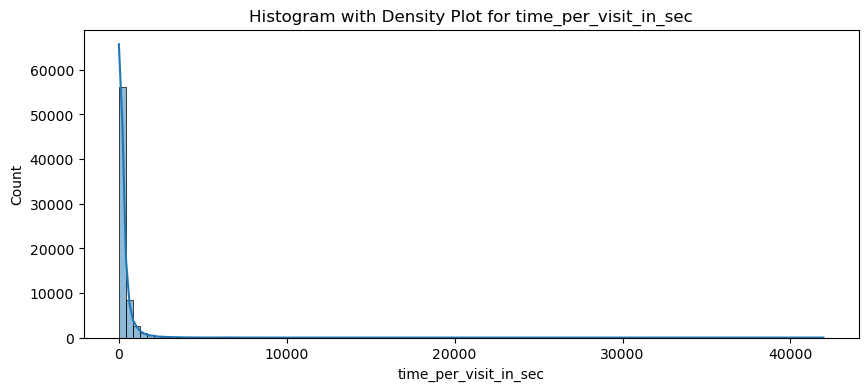

In [28]:
#Check if the data is normally distributed with Histogram
def histogram_with_density_plot(df, column):
    # Reduce the size of the DataFrame by sampling
    plt.figure(figsize=(10, 4))
    sns.histplot(x=df[column], bins=100, kde=True)  # Adjust the number of bins
    plt.title(f'Histogram with Density Plot for {column}')
    plt.show()

# usage:
histogram_with_density_plot(df_time_per_visit_sec, 'time_per_visit_in_sec')

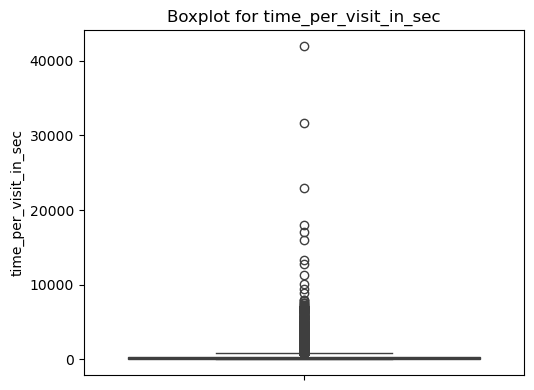

In [29]:
#Boxplot to visually check for outliers
def plot_boxplot(df, column):
    plt.figure(figsize=(10, 4))  # Setting the figure size for better visibility
    plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
    sns.boxplot(y=df[column])
    plt.title(f'Boxplot for {column}')

    plt.tight_layout()  # Adjusts plot parameters for better layout
    plt.show()

# usage:
plot_boxplot(df_time_per_visit_sec, 'time_per_visit_in_sec')

In [30]:
#Shapiro-Wilk test for normality
def shapiro_wilk_test(df, column):
    # Ensure the DataFrame and the specified column exist
    if column in df.columns:
        # Extract the column data
        data = df[column]
        
        # Perform the Shapiro-Wilk test
        stat, p = stats.shapiro(data)
        
        # Display the results
        print(f'Shapiro-Wilk Test for {column}: Statistics={stat:.3f}, p={p:.3f}')
        if p > 0.05:
            print("The data appears to be normally distributed (fail to reject H0).")
        else:
            print("The data does not appear to be normally distributed (reject H0).")
    else:
        print(f"Column '{column}' not found in DataFrame.")

# usage:
shapiro_wilk_test(df_time_per_visit_sec, 'time_per_visit_in_sec')

Shapiro-Wilk Test for time_per_visit_in_sec: Statistics=0.443, p=0.000
The data does not appear to be normally distributed (reject H0).


/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 69205.
  res = hypotest_fun_out(*samples, **kwds)


## Removing outliers

## 1.Remove outliers with Standard Deviation Method.

In [31]:
###  1.Remove outliers with Standard Deviation Method.
def remove_outliers_std(df, column, num_std=3):
    # Calculate the mean and standard deviation
    mean = df[column].mean()
    std_dev = df[column].std()

    # Define outliers as those beyond num_std standard deviations from the mean
    lower_bound = mean - (num_std * std_dev)
    upper_bound = mean + (num_std * std_dev)

    # Filter out outliers
    df_filtered = df[(df[column] > lower_bound) & (df[column] < upper_bound)]
    
    return df_filtered

# usage:
df_time_per_visit_no_outliers_std= remove_outliers_std(df_time_per_visit_sec, 'time_per_visit_in_sec')

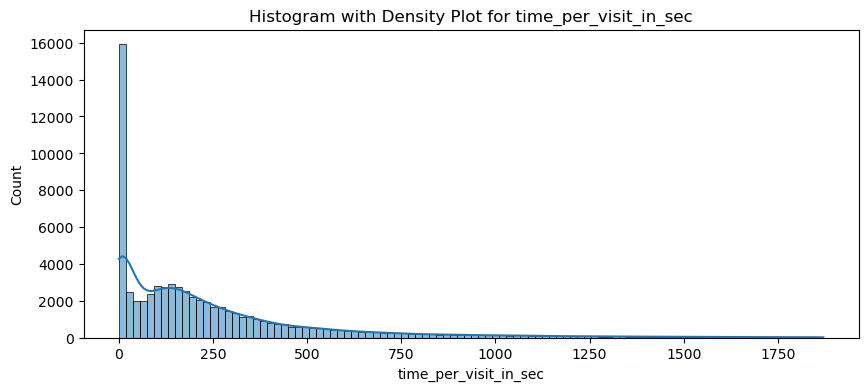

In [32]:
# check without outliers:
histogram_with_density_plot(df_time_per_visit_no_outliers_std, 'time_per_visit_in_sec')

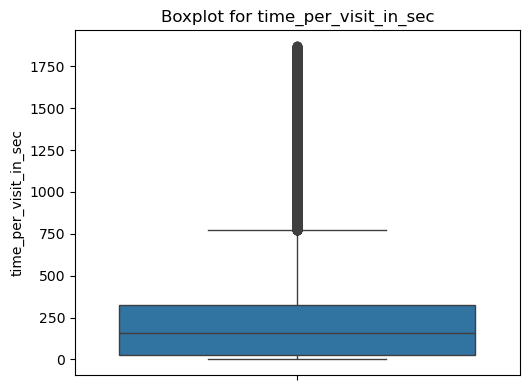

In [33]:
# usage:
plot_boxplot(df_time_per_visit_no_outliers_std, 'time_per_visit_in_sec')

In [34]:
#export df_time_per_visit_no_outliers_std df to csv:
df_time_per_visit_no_outliers_std.to_csv('../data/cleaned/df_time_per_visit_no_outliers_std.csv', index=False)

## 2. Remove outliers with Interquartile Range (IQR) Method

In [35]:
#Remove outliers with Interquartile Range (IQR) Method
def remove_outliers_iqr(df, column):
    # Calculate Q1 and Q3
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Define outliers as those below Q1 - 1.5*IQR or above Q3 + 1.5*IQR
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter out outliers
    df_filtered = df[(df[column] > lower_bound) & (df[column] < upper_bound)]
    
    return df_filtered

# usage:
df_time_per_visit_no_outliers_iqr = remove_outliers_iqr(df_time_per_visit_sec, 'time_per_visit_in_sec')

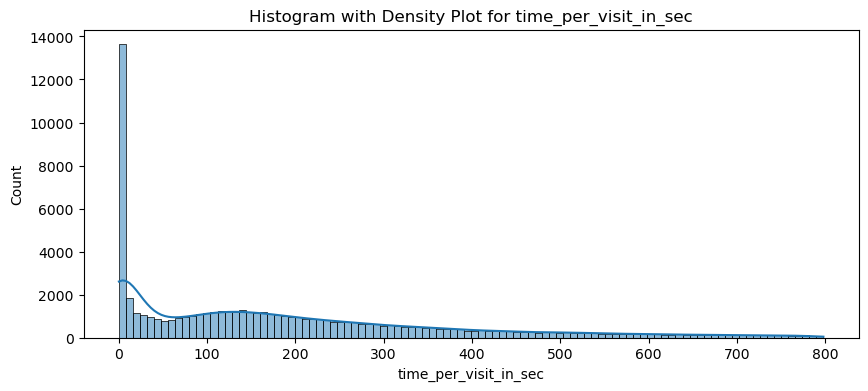

In [36]:
# check without outliers:
histogram_with_density_plot(df_time_per_visit_no_outliers_iqr, 'time_per_visit_in_sec')

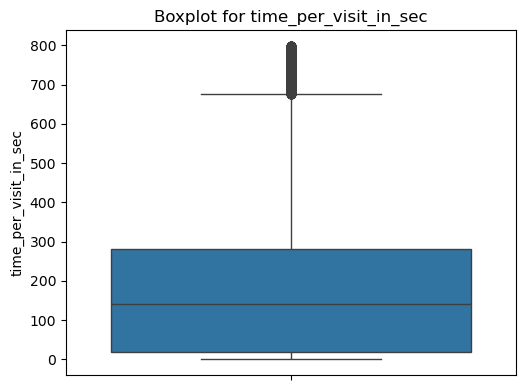

In [37]:
# check without outliers:
plot_boxplot(df_time_per_visit_no_outliers_iqr, 'time_per_visit_in_sec')

In [38]:
#export df_time_per_visit_no_outliers_std df to csv:
df_time_per_visit_no_outliers_iqr.to_csv('../data/cleaned/df_time_per_visit_no_outliers_iqr.csv', index=False)

## KPIs: Calculate the avarage time spent by session in each group

### Calculate the average time spent per visit_id for a given variation (before cleaning outliers)

In [39]:
# calculate the average time spent per visit_id for a given variation (before cleaning outliers)
def average_time_spent(df, variation):
    filtered_df = df[df['variation'] == variation]
    time_spent = filtered_df.groupby('visit_id').agg(
        start_time=('date_time', 'min'),
        end_time=('date_time', 'max')
    )
    # Calculate time spent in seconds
    time_spent['time_spent'] = (time_spent['end_time'] - time_spent['start_time']).dt.total_seconds()
    average_time_seconds = time_spent['time_spent'].mean()
    return average_time_seconds  # Return the calculated average

# Example usage:
# Assuming 'df_cleaned_no_duplicated_confirms_step' is your DataFrame

avg_time_per_visit_test = average_time_spent(df_cleaned_no_duplicated_confirms_step, 'Test')
avg_time_per_visit_control = average_time_spent(df_cleaned_no_duplicated_confirms_step, 'Control')

print(f"Average time spent for Test: {avg_time_per_visit_test:.2f} seconds")
print(f"Average time spent for Control: {avg_time_per_visit_control:.2f} seconds")


Average time spent for Test: 291.65 seconds
Average time spent for Control: 275.26 seconds


### Calculate the average time spent per visit_id for a given variation (after cleaning outliers)

In [47]:
# calculate the average time spent per visit_id for a given variation (after cleaning outliers)
def average_time_spent_per_variation(df, variation):
    # Filter the DataFrame for the given variation
    filtered_df = df[df['variation'] == variation]
    
    # Calculate the average time spent
    average_time = filtered_df['time_per_visit_in_sec'].mean()
    
    return average_time

# Calculate average time spent for 'Test' and 'Control' variations
avg_time_visit_test = average_time_spent_per_variation(df_time_per_visit_no_outliers_iqr, 'Test')
avg_time_visit_control = average_time_spent_per_variation(df_time_per_visit_no_outliers_iqr, 'Control')

print(f"Average time spent for Test variation: {avg_time_visit_test:.2f} seconds")
print(f"Average time spent for Control variation: {avg_time_visit_control:.2f} seconds")

Average time spent for Test variation: 188.05 seconds
Average time spent for Control variation: 185.11 seconds


## KPIs: Calculate the average time spent per each step within each visit_id

In [40]:

def calculate_time_spent(df):
    # Convert date_time to datetime format
    df['date_time'] = pd.to_datetime(df['date_time'])
    
    # Sort data by visit_id and date_time
    df = df.sort_values(by=['visit_id', 'date_time'])
    
    # Initialize dictionaries to store the time differences for Test and Control
    time_differences = {
        'Test': {'time_step_1': [], 'time_step_2': [], 'time_step_3': [], 'time_step_confirm': []},
        'Control': {'time_step_1': [], 'time_step_2': [], 'time_step_3': [], 'time_step_confirm': []}
    }
    
    # Group by visit_id and variation
    grouped = df.groupby(['visit_id', 'variation'])

    for (visit_id, variation), group in grouped:
        group = group.reset_index(drop=True)
        
        # Initialize time variables
        time_start = None
        time_step_1 = None
        time_step_2 = None
        time_step_3 = None
        time_confirm = None

        # Find the time differences for each step
        if 'start' in group['process_step'].values:
            time_start = group[group['process_step'] == 'start']['date_time'].values[0]
        
        if 'step_1' in group['process_step'].values and time_start is not None:
            time_step_1 = group[group['process_step'] == 'step_1']['date_time'].values[0] - time_start
            time_differences[variation]['time_step_1'].append(time_step_1 / np.timedelta64(1, 's'))
        
        if 'step_2' in group['process_step'].values and 'step_1' in group['process_step'].values:
            time_step_2 = group[group['process_step'] == 'step_2']['date_time'].values[0] - group[group['process_step'] == 'step_1']['date_time'].values[0]
            time_differences[variation]['time_step_2'].append(time_step_2 / np.timedelta64(1, 's'))
        
        if 'step_3' in group['process_step'].values and 'step_2' in group['process_step'].values:
            time_step_3 = group[group['process_step'] == 'step_3']['date_time'].values[0] - group[group['process_step'] == 'step_2']['date_time'].values[0]
            time_differences[variation]['time_step_3'].append(time_step_3 / np.timedelta64(1, 's'))
        
        if 'confirm' in group['process_step'].values and 'step_3' in group['process_step'].values:
            time_confirm = group[group['process_step'] == 'confirm']['date_time'].values[0] - group[group['process_step'] == 'step_3']['date_time'].values[0]
            time_differences[variation]['time_step_confirm'].append(time_confirm / np.timedelta64(1, 's'))

    # Calculate the average time for each step for both Test and Control
    average_times = {}
    for variation, times in time_differences.items():
        average_times[variation] = {step: (sum(step_times) / len(step_times)) if step_times else 0 for step, step_times in times.items()}
    
    # Convert the average_times dictionary to a DataFrame
    avg_times_df = pd.DataFrame(average_times)
    
    return avg_times_df

# Example usage
# df = pd.read_csv('your_file.csv')  # Assuming you have the data in a CSV file
average_times_df = calculate_time_spent(df_cleaned_no_duplicated_confirms_step)
average_times_df

,Test,Control
time_step_1,51.459837,63.654396
time_step_2,75.547075,50.159101
time_step_3,107.477350,109.578053
time_step_confirm,142.931253,168.825678


## KPIs: Completion Rate

In [70]:
def calculate_completions_and_rates(df):
    # Extract the date part from 'date_time'
    df['date'] = df['date_time'].dt.date
    
    # Group by date, variation, and 'visit_id', then check if 'confirm' is present for each group
    confirmations = df[df['process_step'] == 'confirm'].groupby(['date', 'variation'])['visit_id'].nunique()

    # Count total unique 'visit_id' per day and variation
    total_visits = df.groupby(['date', 'variation'])['visit_id'].nunique()

    # Prepare the output DataFrame
    output_df = pd.DataFrame({
        'completions': confirmations,
        'total_visits': total_visits
    })

    # Calculate the completion rate
    output_df['completion_rate_per_day'] = output_df['completions'] / output_df['total_visits']

    # Reset index to have 'date' and 'variation' as regular columns
    output_df.reset_index(inplace=True)

    return output_df

completion_rate_day = calculate_completions_and_rates(df_cleaned_no_duplicated_confirms_step)
completion_rate_day

,date,variation,completions,total_visits,completion_rate_per_day
0,2017-03-15,Control,77,121,0.636364
1,2017-03-15,Test,87,146,0.595890
2,2017-03-16,Control,23,47,0.489362
3,2017-03-16,Test,35,56,0.625000
4,2017-03-17,Control,10,24,0.416667
...,...,...,...,...,...
191,2017-06-18,Test,71,132,0.537879
192,2017-06-19,Control,100,186,0.537634
193,2017-06-19,Test,95,165,0.575758
194,2017-06-20,Control,126,223,0.565022


In [72]:
#calculate_average_completion_rate_by_group
def calculate_average_completion_rate_by_variation(df):
    # Group by 'variation' and calculate the mean of 'completion_rate_per_day'
    average_rates = df.groupby('variation')['completion_rate_per_day'].mean()
    
    # Convert the Series to a DataFrame for better presentation
    average_rates_df = average_rates.reset_index()
    average_rates_df.columns = ['Variation', 'Average Completion Rate']
    
    return average_rates_df


average_completion_rates_per_group = calculate_average_completion_rate_by_variation(completion_rate_day)
average_completion_rates_per_group

,Variation,Average Completion Rate
0,Control,0.492034
1,Test,0.567121


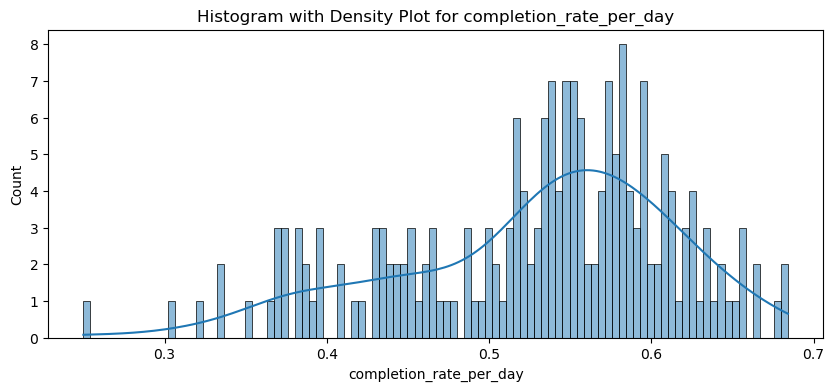

In [73]:
#Check if the data is normally distributed with Histogram
def histogram_with_density_plot(df, column):
    # Reduce the size of the DataFrame by sampling
    plt.figure(figsize=(10, 4))
    sns.histplot(x=df[column], bins=100, kde=True)  # Adjust the number of bins
    plt.title(f'Histogram with Density Plot for {column}')
    plt.show()

# usage:
histogram_with_density_plot(completion_rate_day, 'completion_rate_per_day')

((array([-2.45480884, -2.1175957 , -1.92250888, -1.78123423, -1.66854983,
         -1.57377678, -1.49134287, -1.41795489, -1.35149672, -1.29052394,
         -1.23400447, -1.18117383, -1.13144911, -1.08437504, -1.0395888 ,
         -0.99679625, -0.95575535, -0.9162643 , -0.87815295, -0.84127631,
         -0.80550973, -0.77074511, -0.736888  , -0.70385529, -0.67157337,
         -0.63997667, -0.60900639, -0.57860958, -0.54873827, -0.51934882,
         -0.49040131, -0.46185908, -0.43368828, -0.40585757, -0.37833777,
         -0.35110161, -0.32412347, -0.29737924, -0.27084606, -0.24450224,
         -0.21832705, -0.19230062, -0.16640382, -0.14061815, -0.11492567,
         -0.08930883, -0.06375048, -0.03823371, -0.01274181,  0.01274181,
          0.03823371,  0.06375048,  0.08930883,  0.11492567,  0.14061815,
          0.16640382,  0.19230062,  0.21832705,  0.24450224,  0.27084606,
          0.29737924,  0.32412347,  0.35110161,  0.37833777,  0.40585757,
          0.43368828,  0.46185908,  0.

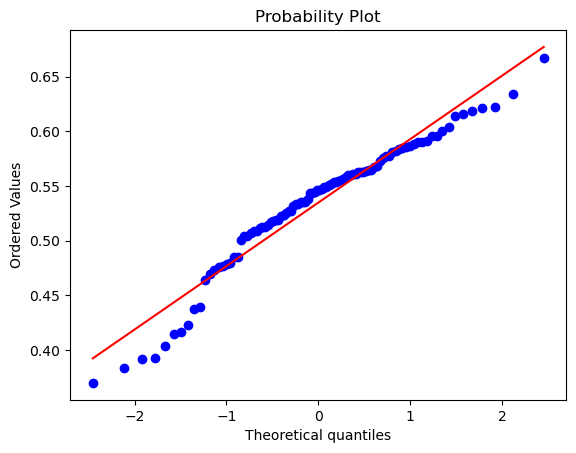

In [64]:
# Q-Q plot 
from scipy import stats
stats.probplot(completion_rate_day['completion_rate_per_day'], plot=plt)

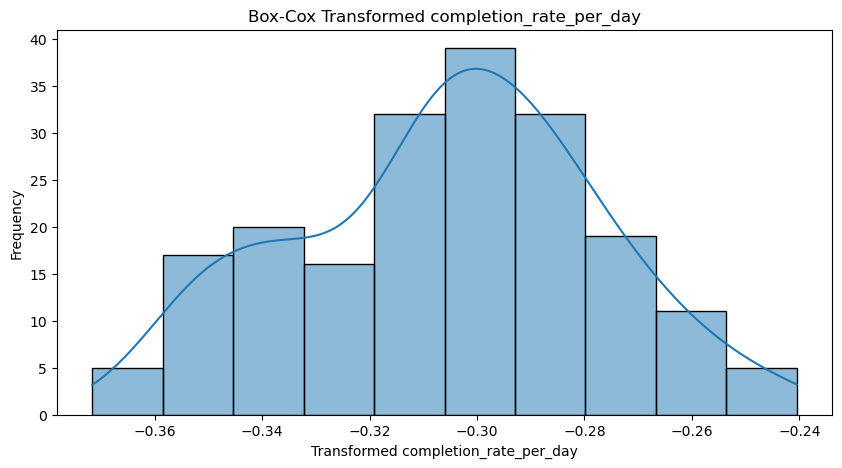

In [82]:
# function box cox 
def apply_boxcox_and_plot(df, column_name):
    # Check if all values are positive, as Box-Cox requires positive data
    if (df[column_name] <= 0).any():
        # Add a small constant to shift all values to be > 0 if any are non-positive
        df[column_name] += (df[column_name].min() * -1) + 1e-5

    # Applying Box-Cox transformation
    transformed_data, _ = boxcox(df[column_name])

    # Plotting the transformed distribution
    plt.figure(figsize=(10, 5))
    sns.histplot(transformed_data, kde=True)
    plt.title(f'Box-Cox Transformed {column_name}')
    plt.xlabel(f'Transformed {column_name}')
    plt.ylabel('Frequency')
    plt.show()

    # Return the transformed data as a new column in the dataframe
    df[f'{column_name}_BoxCox'] = transformed_data
    return df


completion_rate_day_boxcox = apply_boxcox_and_plot(completion_rate_day, 'completion_rate_per_day')


((array([-2.69398007, -2.38376686, -2.20689251, -2.08020554, -1.9801044 ,
         -1.89662906, -1.82459593, -1.76094837, -1.70372617, -1.65159387,
         -1.60359894, -1.5590371 , -1.5173723 , -1.47818664, -1.44114776,
         -1.40598676, -1.37248286, -1.34045247, -1.3097412 , -1.28021789,
         -1.25177015, -1.22430088, -1.1977256 , -1.17197032, -1.14696984,
         -1.1226664 , -1.0990086 , -1.07595042, -1.05345055, -1.03147173,
         -1.0099802 , -0.98894533, -0.96833918, -0.94813621, -0.928313  ,
         -0.90884804, -0.88972147, -0.87091498, -0.85241159, -0.83419554,
         -0.81625218, -0.79856785, -0.78112982, -0.76392613, -0.74694564,
         -0.73017783, -0.71361286, -0.69724142, -0.68105477, -0.66504463,
         -0.64920317, -0.63352298, -0.61799704, -0.60261866, -0.58738149,
         -0.5722795 , -0.55730692, -0.54245825, -0.52772823, -0.51311183,
         -0.49860425, -0.48420087, -0.46989724, -0.45568911, -0.44157239,
         -0.42754313, -0.41359751, -0.

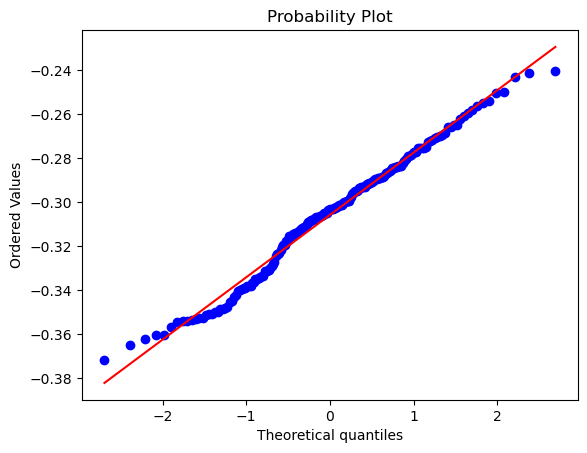

In [81]:
### after box-cox transformation:
# Q-Q plot 
from scipy import stats
stats.probplot(completion_rate_day_boxcox['completion_rate_per_day_BoxCox'], plot=plt)

In [95]:
def calculate_difference_in_completion_rates(df):
    # Group by 'variation' and calculate the mean of 'completion_rate_per_day'
    average_rates = df.groupby('variation')['completion_rate_per_day'].mean()
    
    # Convert the Series to a DataFrame for better presentation
    average_rates_df = average_rates.reset_index()
    average_rates_df.columns = ['Variation', 'average_completion_rate']
    
    # Calculate the difference between the completion rates for 'Control' and 'Test'
    if 'Control' in average_rates_df['Variation'].values and 'Test' in average_rates_df['Variation'].values:
        control_rate = average_rates_df.loc[average_rates_df['Variation'] == 'Control', 'average_completion_rate'].values[0]
        test_rate = average_rates_df.loc[average_rates_df['Variation'] == 'Test', 'average_completion_rate'].values[0]
        difference = test_rate - control_rate
    else:
        difference = None  # Returns None if either 'Control' or 'Test' group is not found
    
    return average_rates_df, difference

#  example
average_completion_rates_per_group, difference = calculate_difference_in_completion_rates(completion_rate_day_boxcox)
print("Average Completion Rates by Group:\n", average_completion_rates_per_group)
print("Difference in Completion Rates: ", difference if difference is not None else "N/A")

Average Completion Rates by Group:
   Variation  average_completion_rate
0   Control                 0.492034
1      Test                 0.567121
Difference in Completion Rates:  0.07508755426657343


## KPIs: Check whether the average age of clients engaging with the new process is the same as those engaging with the old process


In [42]:
def calculate_completion_rate_age(df):
    # Split the dataframe into 'Test' and 'Control' groups
    test_group = df[df['variation'] == 'Test']
    control_group = df[df['variation'] == 'Control']
    
    def get_completion_rate(group):
        # Get the number of unique visit_ids where process_step is 'confirm'
        completed_visits = group[group['process_step'] == 'confirm']['visit_id'].nunique()
        # Get the total number of unique visit_ids in the group
        total_visits = group['visit_id'].nunique()
        # Calculate the completion rate
        completion_rate = completed_visits / total_visits if total_visits > 0 else 0
        # Calculate average age of the group
        average_age = group['age'].mean()
        return completion_rate, total_visits, completed_visits, average_age
    
    # Get results for both groups
    test_results = get_completion_rate(test_group)
    control_results = get_completion_rate(control_group)
    
    # Calculate the increase in average age between Test and Control groups
    increase_in_age = (test_results[3] - control_results[3]) / control_results[3] if control_results[3] > 0 else 0
    
    # Create a DataFrame for visualization
    completion_rates_df = pd.DataFrame({
        'variation': ['Control', 'Test'],
        'completion_rate': [control_results[0], test_results[0]],
        'completed_visits': [control_results[2], test_results[2]],
        'total_visits': [control_results[1], test_results[1]],
        'average_age': [control_results[3], test_results[3]]
    })
    
    return completion_rates_df, increase_in_age

# Usage:
# Assuming 'df_cleaned_without_duplicated_confirms' is your DataFrame
completion_rates_df, increase_in_age = calculate_completion_rate_age(df_cleaned_no_duplicated_confirms_step)
print(completion_rates_df)
print("Increase in average age for Test group compared to Control group:", increase_in_age)

  variation  completion_rate  completed_visits  total_visits  average_age
0   Control         0.496691             15988         32189    48.222558
1      Test         0.584139             21692         37135    48.671740
Increase in average age for Test group compared to Control group: 0.00931477537097433


## KPIs: Check if the average client tenure (how long they've been with Vanguard) of those engaging with the new process is the same as those engaging with the old process


In [44]:
def calculate_completion_rate_tenure_months(df):
    # Split the dataframe into 'Test' and 'Control' groups
    test_group = df[df['variation'] == 'Test']
    control_group = df[df['variation'] == 'Control']
    
    def get_completion_rate(group):
        # Get the number of unique visit_ids where process_step is 'confirm'
        completed_visits = group[group['process_step'] == 'confirm']['visit_id'].nunique()
        # Get the total number of unique visit_ids in the group
        total_visits = group['visit_id'].nunique()
        # Calculate the completion rate
        completion_rate = completed_visits / total_visits if total_visits > 0 else 0
        # Calculate average tenure in months of the group
        average_tenure = group['tenure_month'].mean()
        return completion_rate, total_visits, completed_visits, average_tenure
    
    # Get results for both groups
    test_results = get_completion_rate(test_group)
    control_results = get_completion_rate(control_group)
    
    # Calculate the increase in average tenure months between Test and Control groups
    increase_in_tenure = (test_results[3] - control_results[3]) / control_results[3] if control_results[3] > 0 else 0
    
    # Create a DataFrame for visualization
    completion_rates_df = pd.DataFrame({
        'variation': ['Control', 'Test'],
        'completion_rate': [control_results[0], test_results[0]],
        'completed_visits': [control_results[2], test_results[2]],
        'total_visits': [control_results[1], test_results[1]],
        'average_tenure_months': [control_results[3], test_results[3]]
    })
    
    return completion_rates_df, increase_in_tenure

# Usage:
# Assuming 'df_cleaned_without_duplicated_confirms' is your DataFrame
completion_rates_df, increase_in_tenure = calculate_completion_rate_tenure_months(df_cleaned_no_duplicated_confirms_step)
print(completion_rates_df)
print("Increase in average tenure months for Test group compared to Control group:", increase_in_tenure)

  variation  completion_rate  completed_visits  total_visits  \
0   Control         0.496691             15988         32189   
1      Test         0.584139             21692         37135   

   average_tenure_months  
0             151.823496  
1             152.035431  
Increase in average tenure months for Test group compared to Control group: 0.001395936647811894


## KPIs: Check if there are gender differences that affect engaging with the new or old process

In [45]:

def calculate_completion_rate_gender(df):
    # Split the dataframe into 'Test' and 'Control' groups
    test_group = df[df['variation'] == 'Test']
    control_group = df[df['variation'] == 'Control']
    
    def get_gender_completion_rate(group, gender):
        # Filter the group by gender
        gender_group = group[group['gender'] == gender]
        # Get the number of unique visit_ids where process_step is 'confirm'
        completed_visits = gender_group[gender_group['process_step'] == 'confirm']['visit_id'].nunique()
        # Get the total number of unique visit_ids in the gender-specific group
        total_visits = gender_group['visit_id'].nunique()
        # Calculate the completion rate
        completion_rate = completed_visits / total_visits if total_visits > 0 else 0
        return completion_rate
    
    # Calculate completion rates for males and females in both Test and Control groups
    male_test_completion_rate = get_gender_completion_rate(test_group, 'M')
    female_test_completion_rate = get_gender_completion_rate(test_group, 'F')
    male_control_completion_rate = get_gender_completion_rate(control_group, 'M')
    female_control_completion_rate = get_gender_completion_rate(control_group, 'F')
    
    # Calculate the increase in completion rates
    increase_male = (male_test_completion_rate - male_control_completion_rate) / male_control_completion_rate if male_control_completion_rate > 0 else 0
    increase_female = (female_test_completion_rate - female_control_completion_rate) / female_control_completion_rate if female_control_completion_rate > 0 else 0

    # Create a DataFrame for visualization
    completion_rates_df = pd.DataFrame({
        'Group': ['Test - Male', 'Test - Female', 'Control - Male', 'Control - Female'],
        'Completion Rate': [male_test_completion_rate, female_test_completion_rate, male_control_completion_rate, female_control_completion_rate]
    })
    
    # Display increases separately
    print(f"Increase in completion rate for males (Test vs Control): {increase_male:.2%}")
    print(f"Increase in completion rate for females (Test vs Control): {increase_female:.2%}")
    
    return completion_rates_df

# Usage:
# Assuming 'df_cleaned_without_duplicated_confirms' is your DataFrame
completion_rates_df = calculate_completion_rate_gender(df_cleaned_no_duplicated_confirms_step)
print(completion_rates_df)


Increase in completion rate for males (Test vs Control): 20.34%
Increase in completion rate for females (Test vs Control): 17.36%
              Group  Completion Rate
0       Test - Male         0.598341
1     Test - Female         0.561362
2    Control - Male         0.497205
3  Control - Female         0.478311


# Hypothesis testing


### 'Test' group has completion rate from the A/B test more than 5% then 'Control' group.


In [96]:
def perform_two_sample_t_test(df):
    # Extract the completion rates for Control and Test groups
    control_rate = df[df['Variation'] == 'Control']['average_completion_rate'].iloc[0]
    test_rate = df[df['Variation'] == 'Test']['average_completion_rate'].iloc[0]
    
    # Hypothetical standard deviations and sample sizes if not given
    std_dev_control = 0.05  # Example standard deviation for Control
    std_dev_test = 0.05     # Example standard deviation for Test
    n_control = 100         # Example sample size for Control
    n_test = 100            # Example sample size for Test

    # Calculate the standard error of the difference between the two means
    se_difference = ((std_dev_control**2 / n_control) + (std_dev_test**2 / n_test))**0.5
    
    # Calculate the T-statistic for the difference between the groups
    t_stat = (test_rate - control_rate - 0.05) / se_difference  # Subtract 0.05 to test for more than 5% difference
    
    # Calculate degrees of freedom for two sample t-test
    df = n_control + n_test - 2
    
    # Calculate the p-value from the t distribution
    p_value = 1 - stats.t.cdf(t_stat, df)
    
    # Interpretation based on p-value
    alpha = 0.05  # significance level
    if p_value < alpha:
        interpretation = ("Reject the null hypothesis: There is significant evidence that " +
                          "the 'Test' group's completion rate is more than 5% higher than the 'Control' group.")
    else:
        interpretation = ("Fail to reject the null hypothesis: There is not significant evidence that " +
                          "the 'Test' group's completion rate is more than 5% higher than the 'Control' group.")
    
    return {'T-statistic': t_stat, 'P-value': p_value, 'Interpretation': interpretation}


#  usage:
result = perform_two_sample_t_test(average_completion_rates_per_group)
result

{'T-statistic': 3.5479159490559145,
 'P-value': 0.00024241193051022236,
 'Interpretation': "Reject the null hypothesis: There is significant evidence that the 'Test' group's completion rate is more than 5% higher than the 'Control' group."}

### Test group spends same time as Control group on each step


In [98]:
# Hypothesis
# H0: There is no difference in average times between Test and Control for each step.
# H1: There is a difference in average times between Test and Control for each step.

# Significance level
import scipy.stats as stats

# Setting the significance level
alpha = 0.05

# Container for test results
results = []

# Testing each step for differences in average times between Test and Control groups
for step in average_times_df.index:
    # Extract the time data for both groups at the current step
    time_test = average_times_df.loc[step, 'Test']
    time_control = average_times_df.loc[step, 'Control']
    
    # Conduct a paired T-test for the current step
    _, p_value = stats.ttest_rel([time_test], [time_control])
    
    # Determine the outcome of the hypothesis test
    if p_value > alpha:
        interpretation = "Null hypothesis not rejected: No significant difference found."
    else:
        interpretation = "Null hypothesis rejected: Significant difference found."
    
    # Store results for this step
    results.append((step, f'p-value: {p_value:.4f}', interpretation))

# Display all results
for result in results:
    print(f"{result[0]}: {result[1]}, {result[2]}")

time_step_1: p-value: nan, Null hypothesis rejected: Significant difference found.
time_step_2: p-value: nan, Null hypothesis rejected: Significant difference found.
time_step_3: p-value: nan, Null hypothesis rejected: Significant difference found.
time_step_confirm: p-value: nan, Null hypothesis rejected: Significant difference found.


/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/scipy/stats/_stats_py.py:1087: RuntimeWarning: divide by zero encountered in divide
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/scipy/stats/_stats_py.py:1087: RuntimeWarning: invalid value encountered in scalar multiply
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero


### The average age of clients engaging with the new process is the same as those engaging with the old process
### The average client tenure (how long they've been with Vanguard) of those engaging with the new process is the same as those engaging with the old process
### The gender differences that affect engaging with the new or old process